# tarik data dari API CHEMBL

In [ ]:
pip install chembl-webresource-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
from chembl_webresource_client.new_client import new_client

# Inisialisasi client untuk target
target = new_client.target

# Cari target dengan kata kunci 'EGFR'
egfr_targets = target.search("EGFR")
print(egfr_targets)

# Ambil target pertama (atau pilih yang sesuai dari hasil)
egfr = egfr_targets[0]
print(f"ChEMBL ID untuk EGFR: {egfr['target_chembl_id']}")


[{'cross_references': [{'xref_id': 'Q01279', 'xref_name': None, 'xref_src': 'canSAR-Target'}, {'xref_id': 'NBK23434', 'xref_name': 'EGF receptor (EGFR, HER1)', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23704', 'xref_name': 'EGF receptor (EGFR, HER1)', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23435', 'xref_name': 'EGF receptor (EGFR, HER1)', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23654', 'xref_name': 'EGFR', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23340', 'xref_name': 'EGFR, HER1', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23300', 'xref_name': 'EGFR, HER1 receptor', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23658', 'xref_name': 'Epidermal growth factor receptor', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23690', 'xref_name': 'Epidermal growth factor receptor', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23211', 'xref_name': 'Epidermal growth factor receptor', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23179', 'xref_name': 'Epidermal growth factor receptor', 'xref_src': 'MICAD'}, {'xref_id': 'NBK83905', 'xref_name': 'Ep

In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

# Inisialisasi klien
target = new_client.target
activity = new_client.activity

# Cari target EGFR
egfr = target.filter(target_chembl_id="CHEMBL203")[0]  # Ambil EGFR manusia

# Ambil data bioaktivitas
activities = activity.filter(target_chembl_id=egfr['target_chembl_id'])

# Simpan data ke list
data = []
for record in activities:
    data.append({
        "Molecule ChEMBL ID": record.get("molecule_chembl_id", ""),
        "Assay ChEMBL ID": record.get("assay_chembl_id", ""),
        "Activity Type": record.get("activity_type", ""),
        "Value": record.get("value", ""),
        "Units": record.get("units", ""),
        "Standard Type": record.get("standard_type", ""),
        "Standard Value": record.get("standard_value", ""),
        "Standard Units": record.get("standard_units", ""),
        "SMILES": record.get("canonical_smiles", "")
    })

# Konversi data ke DataFrame dan simpan ke CSV
df = pd.DataFrame(data)
df.to_csv("EGFR_bioactivity.csv", index=False)
print("Data bioaktivitas EGFR disimpan ke file 'EGFR_bioactivity.csv'")


Data bioaktivitas EGFR disimpan ke file 'EGFR_bioactivity.csv'


#Library

In [ ]:
# Instalasi machine Learning Package
import sys
import time
import contextlib
with open('install_ML.log', 'a') as inpt:
    with contextlib.redirect_stdout(inpt):

        # -- Start installation --
        start = time.time()
        !pip install cairosvg
        !pip install padelpy
        !pip install gdown
        !pip install luwiji
        !pip install jcopml
        !pip install chembl_webresource_client

        from luwiji.knn import illustration, demo

        import matplotlib.pyplot as plt
        import seaborn as sns
        import os
        import copy
        from padelpy import padeldescriptor
        import pandas as pd
        import numpy as np

        from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
        from chembl_webresource_client.new_client import new_client
        end = time.time()
        # -- End installation --
print(f'+ Time elapsed: ' + time.strftime('%Mm %Ss', time.gmtime(end - start)))

+ Time elapsed: 01m 00s


In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from jcopml.plot import plot_missing_value

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, Lipinski

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Data Preprocessing




In [ ]:
df = pd.read_csv("/content/EGFR_bioactivity.csv")
df

,Molecule ChEMBL ID,Assay ChEMBL ID,Activity Type,Value,Units,Standard Type,Standard Value,Standard Units,SMILES
0,CHEMBL68920,CHEMBL674637,NaN,0.041,uM,IC50,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL68920,CHEMBL621151,NaN,0.300,uM,IC50,300.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
2,CHEMBL68920,CHEMBL615325,NaN,7.820,uM,IC50,7820.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
3,CHEMBL69960,CHEMBL674637,NaN,0.170,uM,IC50,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69960,CHEMBL621151,NaN,0.040,uM,IC50,40.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
...,...,...,...,...,...,...,...,...,...
33722,CHEMBL1393,CHEMBL5291787,NaN,30.000,uM,AC50,30000.0,nM,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...
33723,CHEMBL535,CHEMBL5291787,NaN,8.600,uM,AC50,8600.0,nM,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
33724,CHEMBL4640049,CHEMBL5304163,NaN,88.000,%,% Ctrl,88.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...
33725,CHEMBL4755229,CHEMBL5304266,NaN,100.000,%,% Ctrl,100.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...


In [ ]:
import pandas as pd

df['Standard Value'] = pd.to_numeric(df['Standard Value'], errors='coerce')

cutoff_active = 100  # < 100 nM untuk 'Active'
cutoff_inactive = 10000  # 10 µM = 10000 nM untuk 'Inactive'

# Tambahkan kolom 'Activity Type' dengan 3 kelas
df['Activity Type'] = df['Standard Value'].apply(
    lambda x: 'Active' if x < cutoff_active else ('Intermediate' if x < cutoff_inactive else 'Inactive')
)

df

,Molecule ChEMBL ID,Assay ChEMBL ID,Activity Type,Value,Units,Standard Type,Standard Value,Standard Units,SMILES
0,CHEMBL68920,CHEMBL674637,Active,0.041,uM,IC50,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL68920,CHEMBL621151,Intermediate,0.300,uM,IC50,300.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
2,CHEMBL68920,CHEMBL615325,Intermediate,7.820,uM,IC50,7820.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
3,CHEMBL69960,CHEMBL674637,Intermediate,0.170,uM,IC50,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69960,CHEMBL621151,Active,0.040,uM,IC50,40.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
...,...,...,...,...,...,...,...,...,...
33722,CHEMBL1393,CHEMBL5291787,Inactive,30.000,uM,AC50,30000.0,nM,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...
33723,CHEMBL535,CHEMBL5291787,Intermediate,8.600,uM,AC50,8600.0,nM,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
33724,CHEMBL4640049,CHEMBL5304163,Active,88.000,%,% Ctrl,88.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...
33725,CHEMBL4755229,CHEMBL5304266,Intermediate,100.000,%,% Ctrl,100.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...


In [ ]:
mapping = {'Active': 0, 'Inactive': 1, 'Intermediate': 2}
df['Class Activity'] = df['Activity Type'].map(mapping)
df

,Molecule ChEMBL ID,Assay ChEMBL ID,Activity Type,Value,Units,Standard Type,Standard Value,Standard Units,SMILES,Class Activity
0,CHEMBL68920,CHEMBL674637,Active,0.041,uM,IC50,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,0
1,CHEMBL68920,CHEMBL621151,Intermediate,0.300,uM,IC50,300.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2
2,CHEMBL68920,CHEMBL615325,Intermediate,7.820,uM,IC50,7820.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2
3,CHEMBL69960,CHEMBL674637,Intermediate,0.170,uM,IC50,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,2
4,CHEMBL69960,CHEMBL621151,Active,0.040,uM,IC50,40.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,0
...,...,...,...,...,...,...,...,...,...,...
33722,CHEMBL1393,CHEMBL5291787,Inactive,30.000,uM,AC50,30000.0,nM,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,1
33723,CHEMBL535,CHEMBL5291787,Intermediate,8.600,uM,AC50,8600.0,nM,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,2
33724,CHEMBL4640049,CHEMBL5304163,Active,88.000,%,% Ctrl,88.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,0
33725,CHEMBL4755229,CHEMBL5304266,Intermediate,100.000,%,% Ctrl,100.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,2


In [ ]:
print("Jumlah nilai null sebelum pembersihan:")
print(df.isnull().sum())

Jumlah nilai null sebelum pembersihan:
Molecule ChEMBL ID       0
Assay ChEMBL ID          0
Activity Type            0
Value                 4210
Units                 5636
Standard Type            0
Standard Value        4210
Standard Units        2683
SMILES                  65
Class Activity           0
dtype: int64


In [ ]:
df_cleaned = df.dropna()
print("\nJumlah nilai null setelah pembersihan:")
print(df_cleaned.isnull().sum())

df_cleaned


Jumlah nilai null setelah pembersihan:
Molecule ChEMBL ID    0
Assay ChEMBL ID       0
Activity Type         0
Value                 0
Units                 0
Standard Type         0
Standard Value        0
Standard Units        0
SMILES                0
Class Activity        0
dtype: int64


,Molecule ChEMBL ID,Assay ChEMBL ID,Activity Type,Value,Units,Standard Type,Standard Value,Standard Units,SMILES,Class Activity
0,CHEMBL68920,CHEMBL674637,Active,0.041,uM,IC50,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,0
1,CHEMBL68920,CHEMBL621151,Intermediate,0.300,uM,IC50,300.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2
2,CHEMBL68920,CHEMBL615325,Intermediate,7.820,uM,IC50,7820.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2
3,CHEMBL69960,CHEMBL674637,Intermediate,0.170,uM,IC50,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,2
4,CHEMBL69960,CHEMBL621151,Active,0.040,uM,IC50,40.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,0
...,...,...,...,...,...,...,...,...,...,...
33722,CHEMBL1393,CHEMBL5291787,Inactive,30.000,uM,AC50,30000.0,nM,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,1
33723,CHEMBL535,CHEMBL5291787,Intermediate,8.600,uM,AC50,8600.0,nM,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,2
33724,CHEMBL4640049,CHEMBL5304163,Active,88.000,%,% Ctrl,88.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,0
33725,CHEMBL4755229,CHEMBL5304266,Intermediate,100.000,%,% Ctrl,100.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,2


In [ ]:
df_cleaned = df_cleaned.drop_duplicates(subset=['SMILES'])
df_cleaned

,Molecule ChEMBL ID,Assay ChEMBL ID,Activity Type,Value,Units,Standard Type,Standard Value,Standard Units,SMILES,Class Activity
0,CHEMBL68920,CHEMBL674637,Active,0.041,uM,IC50,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,0
3,CHEMBL69960,CHEMBL674637,Intermediate,0.170,uM,IC50,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,2
6,CHEMBL137635,CHEMBL677833,Intermediate,9.300,uM,IC50,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,2
7,CHEMBL306988,CHEMBL674643,Inactive,500.000,uM,IC50,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,1
9,CHEMBL66879,CHEMBL674643,Inactive,3000.000,uM,IC50,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,1
...,...,...,...,...,...,...,...,...,...,...
33721,CHEMBL810,CHEMBL5291787,Inactive,30.000,uM,AC50,30000.0,nM,Cn1nnc2c(C(N)=O)ncn2c1=O,1
33722,CHEMBL1393,CHEMBL5291787,Inactive,30.000,uM,AC50,30000.0,nM,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,1
33724,CHEMBL4640049,CHEMBL5304163,Active,88.000,%,% Ctrl,88.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,0
33725,CHEMBL4755229,CHEMBL5304266,Intermediate,100.000,%,% Ctrl,100.0,%,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,2


In [ ]:
selection = ['Molecule ChEMBL ID','SMILES','Standard Value','Activity Type','Class Activity']
df_prep = df_cleaned[selection]
df_prep

,Molecule ChEMBL ID,SMILES,Standard Value,Activity Type,Class Activity
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,Active,0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,Intermediate,2
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,Intermediate,2
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,Inactive,1
9,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,Inactive,1
...,...,...,...,...,...
33721,CHEMBL810,Cn1nnc2c(C(N)=O)ncn2c1=O,30000.0,Inactive,1
33722,CHEMBL1393,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,30000.0,Inactive,1
33724,CHEMBL4640049,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,88.0,Active,0
33725,CHEMBL4755229,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,100.0,Intermediate,2


#Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_prep.SMILES)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
12332,194.154,-2.07810,1.0,7.0
12333,416.583,4.85230,0.0,5.0
12334,484.988,3.33260,2.0,8.0
12335,558.039,2.16350,2.0,10.0


In [ ]:
df_prep = df_prep.reset_index(drop=True)
df_lipinski = df_lipinski.reset_index(drop=True)

# Kemudian gabungkan kedua DataFrame
df_combined = pd.concat([df_prep, df_lipinski], axis=1)
df_combined

,Molecule ChEMBL ID,SMILES,Standard Value,Activity Type,Class Activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,Active,0,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,Intermediate,2,482.903,3.61432,3.0,6.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,Intermediate,2,369.432,4.77200,1.0,6.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,Inactive,1,283.287,2.31056,2.0,4.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,Inactive,1,164.160,1.49000,2.0,2.0
...,...,...,...,...,...,...,...,...,...
12332,CHEMBL810,Cn1nnc2c(C(N)=O)ncn2c1=O,30000.0,Inactive,1,194.154,-2.07810,1.0,7.0
12333,CHEMBL1393,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,30000.0,Inactive,1,416.583,4.85230,0.0,5.0
12334,CHEMBL4640049,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,88.0,Active,0,484.988,3.33260,2.0,8.0
12335,CHEMBL4755229,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,100.0,Intermediate,2,558.039,2.16350,2.0,10.0


In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1) # Changed to axis=1

    return x

def norm_value(input):
    norm = []

    for i in input['Standard Value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('Standard Value', axis=1) # Changed to axis=1

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
df_final

<ipython-input-18-23ff9e6ee4a5>:6: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-18-23ff9e6ee4a5>:6: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,Molecule ChEMBL ID,SMILES,Activity Type,Class Activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,Active,0,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,Intermediate,2,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,Intermediate,2,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,Inactive,1,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,Inactive,1,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...,...
12332,CHEMBL810,Cn1nnc2c(C(N)=O)ncn2c1=O,Inactive,1,194.154,-2.07810,1.0,7.0,4.522879
12333,CHEMBL1393,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,Inactive,1,416.583,4.85230,0.0,5.0,4.522879
12334,CHEMBL4640049,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,Active,0,484.988,3.33260,2.0,8.0,7.055517
12335,CHEMBL4755229,CNC(=O)COc1cc2cc(Nc3nc(N4CCC(C(=O)N(C)C)CC4)nc...,Intermediate,2,558.039,2.16350,2.0,10.0,7.000000


In [ ]:
df_2class = df_final[df_final['Activity Type'] != 'Intermediate']
df_2class

,Molecule ChEMBL ID,SMILES,Activity Type,Class Activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,Active,0,383.814,4.45034,3.0,4.0,7.387216
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,Inactive,1,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,Inactive,1,164.160,1.49000,2.0,2.0,2.522879
5,CHEMBL77085,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],Inactive,1,215.168,1.73096,1.0,5.0,4.017729
7,CHEMBL76979,COc1cc(/C=C(\C#N)C(=O)O)cc(OC)c1O,Inactive,1,249.222,1.40098,2.0,5.0,3.578396
...,...,...,...,...,...,...,...,...,...
12331,CHEMBL1371770,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1,Inactive,1,298.346,1.52750,0.0,6.0,4.522879
12332,CHEMBL810,Cn1nnc2c(C(N)=O)ncn2c1=O,Inactive,1,194.154,-2.07810,1.0,7.0,4.522879
12333,CHEMBL1393,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,Inactive,1,416.583,4.85230,0.0,5.0,4.522879
12334,CHEMBL4640049,CNC(=O)COc1cc2cc(Nc3nc(N4C[C@H](C)C[C@H](C)C4)...,Active,0,484.988,3.33260,2.0,8.0,7.055517


In [ ]:
df2class = df_2class.dropna(subset=['SMILES', 'pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'])

In [ ]:
df2class['Activity Type'] = df2class['Activity Type'].astype('category')
df2class['pIC50'] = pd.to_numeric(df2class['pIC50'], errors='coerce')

<ipython-input-22-5f6c8c4675f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2class['Activity Type'] = df2class['Activity Type'].astype('category')
<ipython-input-22-5f6c8c4675f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2class['pIC50'] = pd.to_numeric(df2class['pIC50'], errors='coerce')


In [ ]:
df2class.to_csv('01_label2class_egfr.csv', index=False)

# Plotting

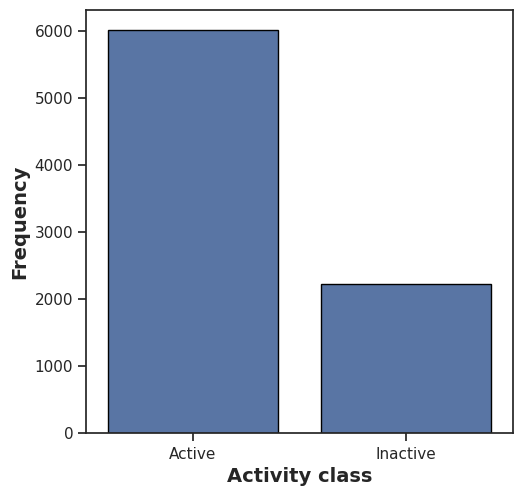

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Activity Type', data=df2class, edgecolor='black')

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


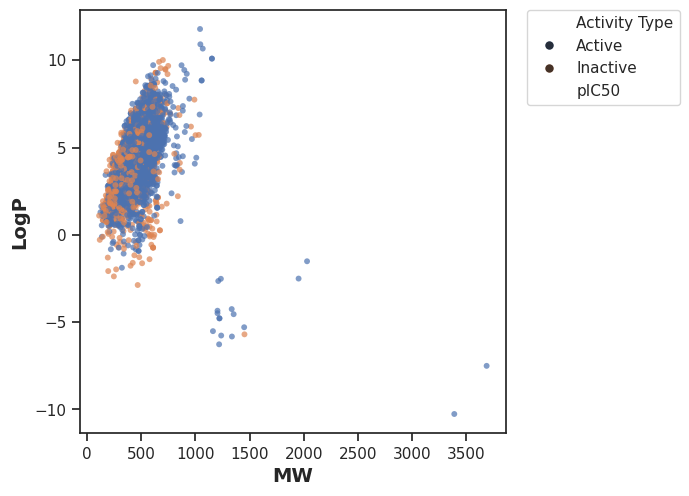

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df2class, hue='Activity Type', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

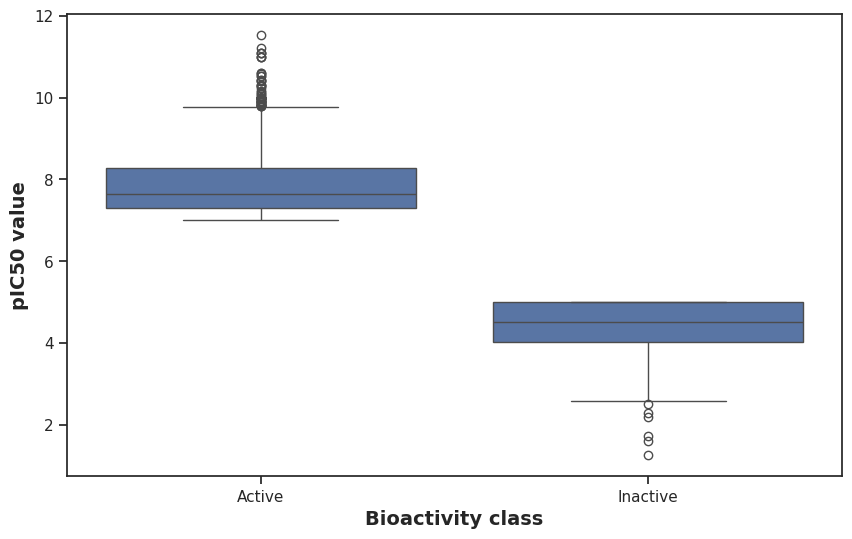

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'Activity Type', y = 'pIC50', data = df2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Activity Type']
  df = df2class[selection]
  active = df[df['Activity Type'] == 'Active']
  active = active[descriptor]

  selection = [descriptor, 'Activity Type']
  df = df2class[selection]
  inactive = df[df['Activity Type'] == 'Inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,13438194.0,0.0,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

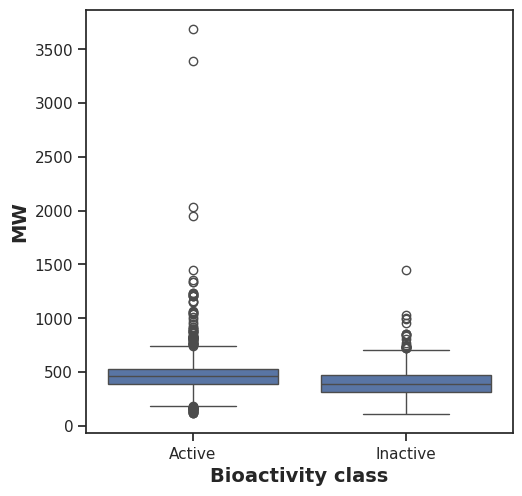

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity Type', y = 'MW', data = df2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8961478.0,2.386505e-120,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

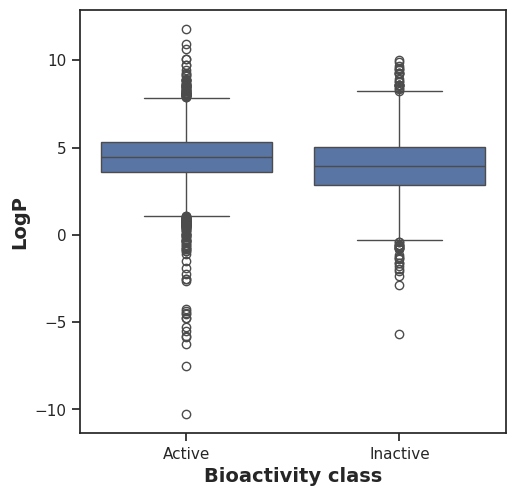

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity Type', y = 'LogP', data = df2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,8023107.5,6.453325e-42,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

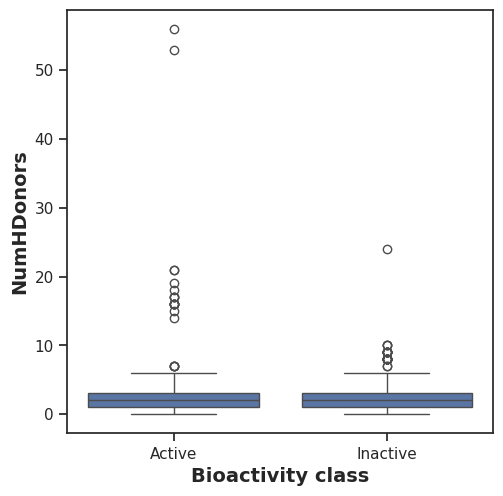

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity Type', y = 'NumHDonors', data = df2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7257334.5,4.655712e-09,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHAcceptors')

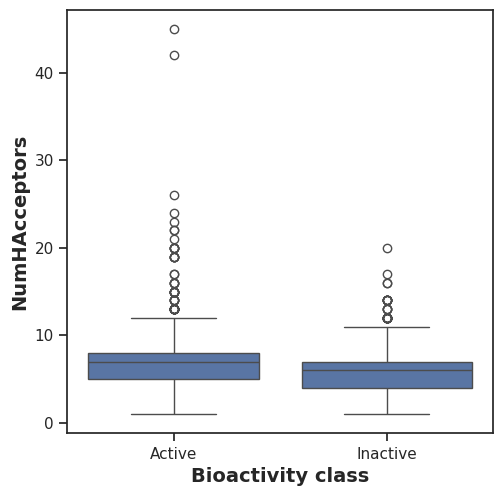

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity Type', y = 'NumHAcceptors', data = df2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,8813021.0,2.922315e-107,0.05,Different distribution (reject H0)


In [ ]:
selection = ['SMILES','Molecule ChEMBL ID']
df_selection = df2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2024-12-24 22:32:08--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-12-24 22:32:08--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  84.4MB/s    in 0.3s    

2024-12-24 22:32:09 (84.4 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-12-24 22:32:09--  https://githu

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-12-24 22:32:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   101MB/s    in 0.8s    

2024-12-24 22:32:11 (101 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handl

In [ ]:
! conda install -c rdkit rdkit -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 4.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 


In [ ]:
! cat molecule.smi | head -5

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1	CHEMBL306988
O=C(O)/C=C/c1ccc(O)cc1	CHEMBL66879
N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-]	CHEMBL77085
COc1cc(/C=C(\C#N)C(=O)O)cc(OC)c1O	CHEMBL76979


In [ ]:
! cat molecule.smi | wc -l

8251


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL1909386 in molecule.smi (3252/8251). Average speed: 0.25 s/mol.
Processing CHEMBL303687 in molecule.smi (3254/8251). Average speed: 0.25 s/mol.
Processing CHEMBL231013 in molecule.smi (3255/8251). Average speed: 0.25 s/mol.
Processing CHEMBL443563 in molecule.smi (3256/8251). Average speed: 0.25 s/mol.
Processing CHEMBL206010 in molecule.smi (3257/8251). Average speed: 0.25 s/mol.
Processing CHEMBL275473 in molecule.smi (3259/8251). Average speed: 0.25 s/mol.
Processing CHEMBL251549 in molecule.smi (3258/8251). Average speed: 0.25 s/mol.
Processing CHEMBL1096634 in molecule.smi (3261/8251). Average speed: 0.25 s/mol.
Processing CHEMBL215993 in molecule.smi (3260/8251). Average speed: 0.25 s/mol.
Processing CHEMBL1909382 in molecule.smi (3262/8251). Average speed: 0.25 s/mol.
Processing CHEMBL1909364 in molecule.smi (3263/8251). Average speed: 0.25 s/mol.
Processing CHEMBL269827 in molecule.smi (3264/8251). Average spee

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8247,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2class_prep = pd.read_csv('/content/01_label2class_egfr.csv')

In [ ]:
selection1= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
df_Y = df_2class_prep [selection1]
df_Y

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,7.387216,383.814,4.45034,3.0,4.0
1,3.301030,283.287,2.31056,2.0,4.0
2,2.522879,164.160,1.49000,2.0,2.0
3,4.017729,215.168,1.73096,1.0,5.0
4,3.578396,249.222,1.40098,2.0,5.0
...,...,...,...,...,...
8246,4.522879,298.346,1.52750,0.0,6.0
8247,4.522879,194.154,-2.07810,1.0,7.0
8248,4.522879,416.583,4.85230,0.0,5.0
8249,7.055517,484.988,3.33260,2.0,8.0


In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,7.387216,383.814,4.45034,3.0,4.0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3.301030,283.287,2.31056,2.0,4.0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2.522879,164.160,1.49000,2.0,2.0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.017729,215.168,1.73096,1.0,5.0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3.578396,249.222,1.40098,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.522879,298.346,1.52750,0.0,6.0
8247,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.522879,194.154,-2.07810,1.0,7.0
8248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.522879,416.583,4.85230,0.0,5.0
8249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,7.055517,484.988,3.33260,2.0,8.0


In [ ]:
dataset.isna().sum()

,0
PubchemFP0,0
PubchemFP1,0
PubchemFP2,0
PubchemFP3,0
PubchemFP4,0
...,...
pIC50,0
MW,0
LogP,0
NumHDonors,0


In [ ]:
selection2= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
lipinski = dataset [selection2]
lipinski.head()

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,7.387216,383.814,4.45034,3.0,4.0
1,3.301030,283.287,2.31056,2.0,4.0
2,2.522879,164.160,1.49000,2.0,2.0
3,4.017729,215.168,1.73096,1.0,5.0
4,3.578396,249.222,1.40098,2.0,5.0


In [ ]:
variance = dataset.drop(columns= ['pIC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'], axis=1)
variance.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance = selection.fit_transform(variance)
variance = pd.DataFrame(variance)
variance.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
143,0
144,0
145,0
146,0


In [ ]:
variance.columns = variance.columns.astype(str)

In [ ]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,7.387216,383.814,4.45034,3.0,4.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3.301030,283.287,2.31056,2.0,4.0
2,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,2.522879,164.160,1.49000,2.0,2.0
3,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,4.017729,215.168,1.73096,1.0,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,3.578396,249.222,1.40098,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,4.522879,298.346,1.52750,0.0,6.0
8247,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,4.522879,194.154,-2.07810,1.0,7.0
8248,1,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,4.522879,416.583,4.85230,0.0,5.0
8249,1,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,7.055517,484.988,3.33260,2.0,8.0


In [ ]:
fix.to_csv('02_dataset_model_egfr.csv', index=False)

In [ ]:
def pIC50(input):
       pIC50 = []

       for i in input['standard_value_norm']:
           molar = i*(10**-9) # Converts nM to M
           # Handle cases where molar is 0 or very small
           if molar > 0 and molar < np.finfo(np.float64).tiny: # Avoid log(0) and very large values
              pIC50.append(-np.log10(molar))
           else:
              pIC50.append(np.nan)  # Or a suitable large value

       input['pIC50'] = pIC50
       x = input.drop('standard_value_norm', axis=1) # Changed to axis=1

       return x

In [ ]:
fix = fix.replace([np.inf, -np.inf], np.nan).dropna(subset=['pIC50'])

In [ ]:
X = fix.drop(columns="pIC50")
Y = fix.pIC50
Y

,pIC50
0,7.387216
1,3.301030
2,2.522879
3,4.017729
4,3.578396
...,...
8246,4.522879
8247,4.522879
8248,4.522879
8249,7.055517


In [ ]:
print(fix.isnull().sum())  # Periksa nilai kosong
print(fix.describe())  # Periksa statistik data

0                0
1                0
2                0
3                0
4                0
                ..
pIC50            0
MW               0
LogP             0
NumHDonors       0
NumHAcceptors    0
Length: 153, dtype: int64
                 0            1           2            3            4  \
count  8127.000000  8127.000000  8127.00000  8127.000000  8127.000000   
mean      0.786268     0.761166     0.73262     0.236988     0.297158   
std       0.409965     0.426397     0.44262     0.425261     0.457035   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       1.000000     1.000000     0.00000     0.000000     0.000000   
50%       1.000000     1.000000     1.00000     0.000000     0.000000   
75%       1.000000     1.000000     1.00000     0.000000     1.000000   
max       1.000000     1.000000     1.00000     1.000000     1.000000   

                 5            6            7            8            9  ...  \
count  8127.000000  8127.000

# Model Random Forest

In [ ]:
X = fix.drop(columns="pIC50")
y = fix.pIC50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6501, 152), (1626, 152), (6501,), (1626,))

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,MW,LogP,NumHDonors,NumHAcceptors
6629,1,1,1,0,0,0,0,1,1,1,...,0,1,0,1,0,1,646.344,1.55290,2.0,8.0
6247,1,1,1,1,0,1,1,0,0,0,...,0,0,0,1,0,1,552.037,3.96550,2.0,8.0
2829,1,1,1,0,0,1,0,1,1,1,...,0,1,0,1,0,1,420.498,3.86234,3.0,5.0
438,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,343.431,2.60560,2.0,6.0
5298,1,1,1,0,0,1,1,1,1,1,...,1,0,1,0,1,1,578.525,7.99150,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,1,1,1,0,0,0,1,1,1,1,...,1,0,1,0,1,1,530.416,4.79270,1.0,10.0
5492,1,1,1,1,0,0,1,0,0,0,...,1,0,1,0,1,1,493.391,4.41480,1.0,8.0
861,1,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,1,333.391,2.45770,1.0,3.0
7725,1,1,1,0,0,0,0,1,1,1,...,1,1,0,1,1,0,596.780,6.34142,3.0,9.0


In [ ]:
y_train

,pIC50
6629,9.657577
6247,7.316773
2829,7.013228
438,5.000000
5298,7.301030
...,...
5328,7.301030
5492,7.301030
861,4.000000
7725,7.318759


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluasi
Y_pred = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, Y_pred))
print("R2 Score:", r2_score(y_test, Y_pred))

MSE: 1.4057720380781176
R2 Score: 0.5008627053835704


In [ ]:
Y_pred = rf.predict(X_test)

In [ ]:
Y_pred = rf.predict(X)
Y_pred.shape

(8127,)

In [ ]:
Y_pred

array([6.93996238, 3.70623415, 3.15302522, ..., 5.18312416, 6.52376864,
       7.21070155])

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.43
Coefficient of determination (R^2): 0.84


Text(0.5, 0, 'Experimental pIC50')

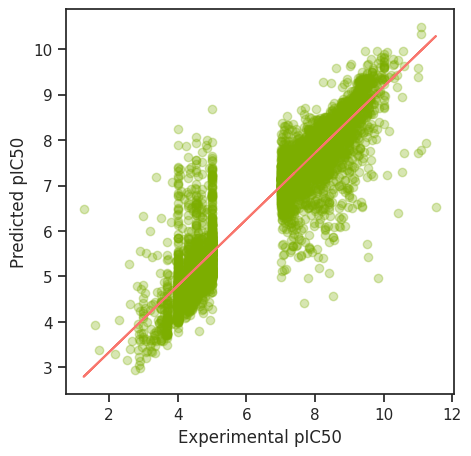

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [ ]:
import joblib

# Simpan model
joblib.dump(rf, 'virtual_screening_model.pkl')

# Muat model kembali
model = joblib.load('virtual_screening_model.pkl')

# Prediksi Virtual Screening

In [ ]:
dataset = pd.read_csv('/content/01_label2class_egfr.csv')

selection = ['SMILES','pIC50']
dataset = dataset[selection]
dataset.to_csv('input_deskriptor.csv', index=False)

In [ ]:
dataset = pd.read_csv('input_deskriptor.csv')
dataset.head()

,SMILES,pIC50
0,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
2,O=C(O)/C=C/c1ccc(O)cc1,2.522879
3,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],4.017729
4,COc1cc(/C=C(\C#N)C(=O)O)cc(OC)c1O,3.578396


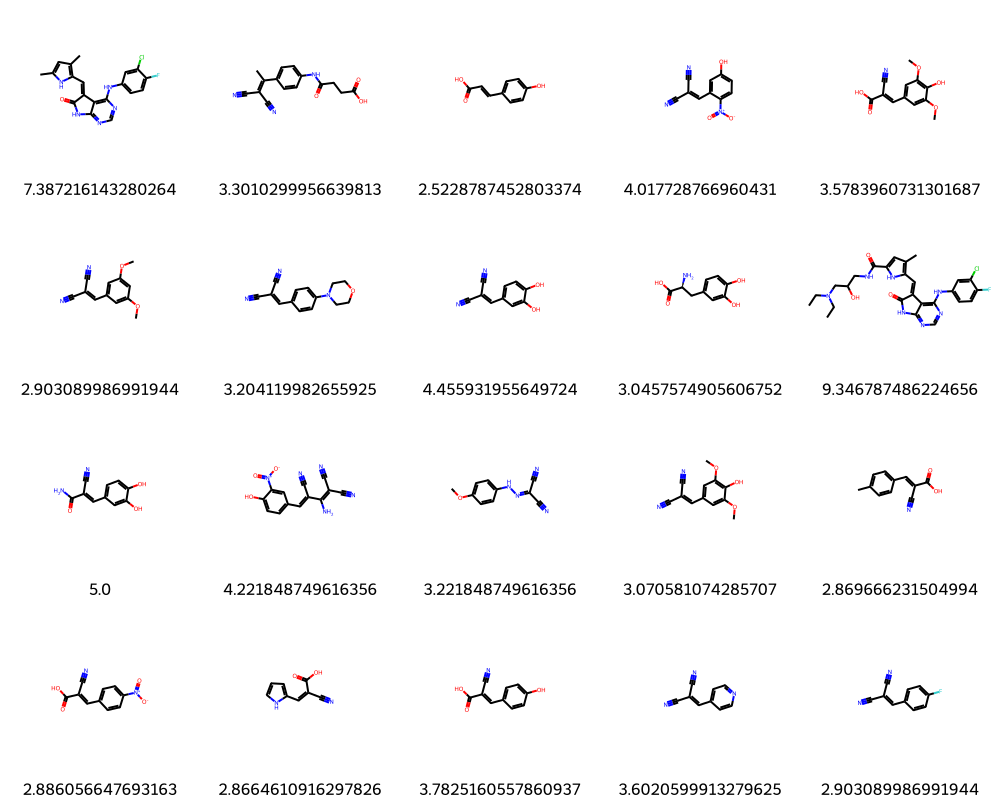

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100,legends=[str(x) for x in dataset.pIC50], subImgSize=(200,200), molsPerRow=5)

# predict virtual screening

In [ ]:
new_smiles = [
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # aspirin
    "CC(=O)NC1=CC=C(O)C=C1", #paracetamol
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C", #cafein
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O", #ibuprofen
    "CC1(C(=O)NC2=C(S1)C(=O)N2CC3=CC=CC=C3)C(=O)O" #antibiotik
]


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import pandas as pd

fingerprints = []
props = []
for smi in new_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol:

        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())

        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        h_donors = Descriptors.NumHDonors(mol)
        h_acceptors = Descriptors.NumHAcceptors(mol)
        props.append([mw, logp, h_donors, h_acceptors])
    else:
        print(f"Invalid SMILES: {smi}")

# Buat DataFrame untuk fingerprint
fingerprints_df = pd.DataFrame([list(map(int, fp)) for fp in fingerprints], columns=[f"FP_{i}" for i in range(2048)])

# Buat DataFrame untuk properti molekul
props_df = pd.DataFrame(props, columns=["MW", "LogP", "NumHDonors", "NumHAcceptors"])

# Gabungkan fingerprint dan properti
screening_data = pd.concat([fingerprints_df, props_df], axis=1)

In [ ]:
print("Fitur yang digunakan saat pelatihan model:", model.feature_names_in_)

print("Kolom fitur pada data prediksi:", screening_data.columns)


Fitur yang digunakan saat pelatihan model: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 'MW' 'LogP' 'NumHDonors' 'NumHAcceptors']
Kolom fitur pada data prediksi: Index(['FP_0', 'FP_1', 'FP_2', 'FP_3', 'FP_4', 'FP_5', 'FP_6', 'FP_7', 'FP_8',
       'FP_9',

In [ ]:
fingerprint_columns = [f"{i}" for i in range(2048)]
screening_data.columns = fingerprint_columns + ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

print(screening_data.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2042', '2043', '2044', '2045', '2046', '2047', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors'],
      dtype='object', length=2052)


In [ ]:
screening_data = screening_data[model.feature_names_in_]
print(screening_data.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '142', '143', '144', '145', '146', '147', 'MW', 'LogP', 'NumHDonors',
       'NumHAcceptors'],
      dtype='object', length=152)


In [ ]:
predictions = model.predict(screening_data)

screening_results = pd.DataFrame({
    'SMILES': new_smiles,
    'Predicted pIC50': predictions
})

# Tampilkan hasil prediksi
print(screening_results)


                                         SMILES  Predicted pIC50
0                      CC(=O)OC1=CC=CC=C1C(=O)O         3.877368
1                         CC(=O)NC1=CC=C(O)C=C1         4.685321
2                  CN1C=NC2=C1C(=O)N(C(=O)N2C)C         4.231836
3                 CC(C)CC1=CC=C(C=C1)C(C)C(=O)O         4.419715
4  CC1(C(=O)NC2=C(S1)C(=O)N2CC3=CC=CC=C3)C(=O)O         4.568879


semakin tinggi = semakin baik

1. Senyawa ini memiliki pIC50 yang relatif tinggi, menunjukkan bahwa senyawa ini kemungkinan efektif dalam menghambat target biologis. Dengan nilai pIC50 ini, senyawa ini akan memerlukan konsentrasi yang lebih rendah untuk mencapai penghambatan 50%.

2. Nilai pIC50 yang lebih tinggi menunjukkan bahwa senyawa ini diprediksi sangat efektif dalam menghambat aktivitas target biologis. Molekul ini lebih efektif dibandingkan dengan Molekul 1, membutuhkan konsentrasi yang lebih rendah untuk penghambatan 50%.
3. Nilai pIC50 ini menunjukkan bahwa senyawa ini juga cukup efektif, meskipun sedikit lebih rendah dibandingkan dengan Molekul 2. Senyawa ini masih menunjukkan aktivitas yang cukup kuat terhadap target biologisnya.
4. Molekul ini memiliki pIC50 yang cukup tinggi, hampir setara dengan Molekul 3, yang menunjukkan potensi penghambatan yang cukup baik.
5. Molekul ini juga menunjukkan pIC50 yang tinggi, mendekati nilai yang lebih tinggi daripada Molekul 3 dan 4, yang berarti senyawa ini mungkin sangat efektif dalam menghambat aktivitas target biologisnya.